# The purpose of this project is to categorize the label of E Coli Dataset based on the features provide and evaluate the performance of different models of Deep learning using parameter tuning


## tool used for data preprocessing: pandas

## tool used for visualization : matplotlib

## model used for prediction: Deep Learning with parameter tuning (see the paragraph below for details)

## tools used for data validation: the loss of the model was determined by categorical cross entropy and the accruacry was measured by accuracy metrics




In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/'My Drive'/'Colab Notebooks'
%ls

/content/drive/My Drive/Colab Notebooks
 abalone.data                     'ML Challenge 1.ipynb'
 bpRNA_CRW_2852.ct                'ML Challenge II .ipynb'
 bpRNA_CRW_2852_predicted.ct      'ML Challenge IV .ipynb'
 bpRNA_CRW_2852.st                 model_lr0.001.h5
 breast-cancer.data                model_lr0.01.h5
 car.data                          model_lr0.1.h5
 car.dot                          'Object Detection Homework'/
 car_model.dot                     Perceptron_practise.ipynb
 car.png                          'Practise 1.ipynb'
'Copied Homeworks'/               'Practise 2.ipynb'
 DeepLearningImageTutorial.ipynb   Protein_Project.ipynb
'ecoli .data'                      SPECT_model.h5
 exam.xlsx                         SPECT.test
 homework01.ipynb                  SPECT.train
 homework02.ipynb                  transfusion.data
 homework03.ipynb                  tree.dot
 homework05.ipynb                  tree.png
 homework06.ipynb                  Untitled0.ipynb
 homework07

In [ ]:
import pandas as pd
ecoli_df = pd.read_csv('ecoli .data', header=None, delim_whitespace=True)
ecoli_df.columns = ['sequence','mcg','gvh','lip','chg','aac','alm1','alm2','Label']

In [ ]:
ecoli_df

,sequence,mcg,gvh,lip,chg,aac,alm1,alm2,Label
0,AAT_ECOLI,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,ACEA_ECOLI,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,ACEK_ECOLI,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,ACKA_ECOLI,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,ADI_ECOLI,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp
...,...,...,...,...,...,...,...,...,...
331,TREA_ECOLI,0.74,0.56,0.48,0.5,0.47,0.68,0.30,pp
332,UGPB_ECOLI,0.71,0.57,0.48,0.5,0.48,0.35,0.32,pp
333,USHA_ECOLI,0.61,0.60,0.48,0.5,0.44,0.39,0.38,pp
334,XYLF_ECOLI,0.59,0.61,0.48,0.5,0.42,0.42,0.37,pp


In [ ]:
ecoli_df_updated = ecoli_df.drop('sequence',axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
ecoli_df_updated = ecoli_df.drop('sequence',axis=1)
ecoli_df_updated['Label'] = LabelEncoder().fit_transform(ecoli_df['Label'])

In [ ]:
data_label = ecoli_df_updated['Label']
data_feature = ecoli_df_updated.drop('Label',axis= 1)
from sklearn.model_selection import train_test_split
X_data, X_test, y_data, y_test = train_test_split(data_feature,data_label, stratify=data_label,test_size=0.20, random_state=42)

In [ ]:
### apply one-hot encoding here
from keras.utils.np_utils import to_categorical
y_data_categorical = to_categorical(y_data, 8)
y_test_categorical = to_categorical(y_test, 8)
print("X_data shape:", X_data.shape)
print("X_test shape:", X_test.shape)
print("y_data shape:", y_data_categorical.shape)
print("y_test shape:", y_test_categorical.shape)

X_data shape: (268, 7)
X_test shape: (68, 7)
y_data shape: (268, 8)
y_test shape: (68, 8)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(20,input_shape=(X_data.shape[1],),activation='relu')) # input layer --> hidden layer 1
model.add(Dense(20,activation='relu')) # hidden layer 1 --> hidden layer 2
model.add(Dense(8 ,activation ='sigmoid')) # hidden layer 2 --> output layer
# Compile model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
train_history = model.fit(X_data,y_data_categorical , validation_split=0.1, batch_size=5, epochs = 30)

Epoch 1/30
49/49 [==============================] - 0s 4ms/step - loss: 2.0525 - accuracy: 0.1120 - val_loss: 1.9934 - val_accuracy: 0.4444
Epoch 2/30
49/49 [==============================] - 0s 2ms/step - loss: 1.9282 - accuracy: 0.5394 - val_loss: 1.8518 - val_accuracy: 0.6667
Epoch 3/30
49/49 [==============================] - 0s 2ms/step - loss: 1.7691 - accuracy: 0.5726 - val_loss: 1.6492 - val_accuracy: 0.6296
Epoch 4/30
49/49 [==============================] - 0s 2ms/step - loss: 1.6130 - accuracy: 0.4315 - val_loss: 1.5098 - val_accuracy: 0.5185
Epoch 5/30
49/49 [==============================] - 0s 2ms/step - loss: 1.5336 - accuracy: 0.4149 - val_loss: 1.4019 - val_accuracy: 0.5185
Epoch 6/30
49/49 [==============================] - 0s 2ms/step - loss: 1.4772 - accuracy: 0.4149 - val_loss: 1.3301 - val_accuracy: 0.5185
Epoch 7/30
49/49 [==============================] - 0s 1ms/step - loss: 1.4303 - accuracy: 0.4149 - val_loss: 1.2807 - val_accuracy: 0.5185
Epoch 8/30
49/49 [==

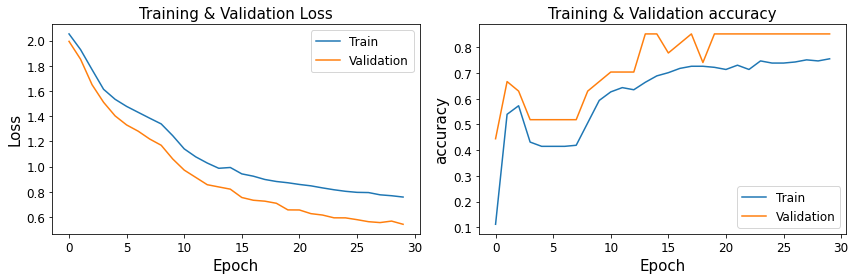

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
# Plot training & validation loss values
plt.plot(train_history.history['loss'], label='Train')
plt.plot(train_history.history['val_loss'], label='Validation')
plt.title('Training & Validation Loss', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xlabel('Epoch', fontsize=15)
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.legend(loc='upper right', fontsize=12)


plt.subplot(1,2,2)
# Plot training & validation accuracy values
plt.plot(train_history.history['accuracy'], label='Train')
plt.plot(train_history.history['val_accuracy'], label='Validation')
plt.title('Training & Validation accuracy', fontsize=15)
plt.ylabel('accuracy', fontsize=15)
plt.xlabel('Epoch', fontsize=15)
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.legend(loc='lower right', fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
# training data
model.evaluate(X_data,y_data_categorical)

# testing data
model.evaluate(X_test,y_test_categorical)

3/3 [==============================] - 0s 2ms/step - loss: 0.5724 - accuracy: 0.7941


[0.5723753571510315, 0.7941176295280457]

In [ ]:
import numpy as np
model_norm = Sequential()
model_norm.add(Dense(10,input_shape=(X_data.shape[1],),activation='relu')) # input layer --> hidden layer 1
model_norm.add(Dense(20,activation='relu')) # hidden layer 1 --> hidden layer 2
model_norm.add(Dense(8 ,activation ='sigmoid')) # hidden layer 2 --> output layer
# Compile model
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_data.astype(np.float32))
X_test_s = scaler.transform(X_test.astype(np.float32))
model_norm.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
train_history_2 = model_norm.fit(X_train_s,y_data_categorical , validation_split=0.1, batch_size=5, epochs = 30)

Epoch 1/30
49/49 [==============================] - 0s 3ms/step - loss: 1.9673 - accuracy: 0.4274 - val_loss: 1.8363 - val_accuracy: 0.5185
Epoch 2/30
49/49 [==============================] - 0s 1ms/step - loss: 1.7839 - accuracy: 0.4357 - val_loss: 1.6222 - val_accuracy: 0.5185
Epoch 3/30
49/49 [==============================] - 0s 1ms/step - loss: 1.5778 - accuracy: 0.4523 - val_loss: 1.3616 - val_accuracy: 0.5185
Epoch 4/30
49/49 [==============================] - 0s 1ms/step - loss: 1.3472 - accuracy: 0.4855 - val_loss: 1.0979 - val_accuracy: 0.5556
Epoch 5/30
49/49 [==============================] - 0s 1ms/step - loss: 1.1444 - accuracy: 0.6183 - val_loss: 0.9080 - val_accuracy: 0.6296
Epoch 6/30
49/49 [==============================] - 0s 1ms/step - loss: 1.0038 - accuracy: 0.6722 - val_loss: 0.7795 - val_accuracy: 0.6667
Epoch 7/30
49/49 [==============================] - 0s 1ms/step - loss: 0.8793 - accuracy: 0.7137 - val_loss: 0.6684 - val_accuracy: 0.7778
Epoch 8/30
49/49 [==

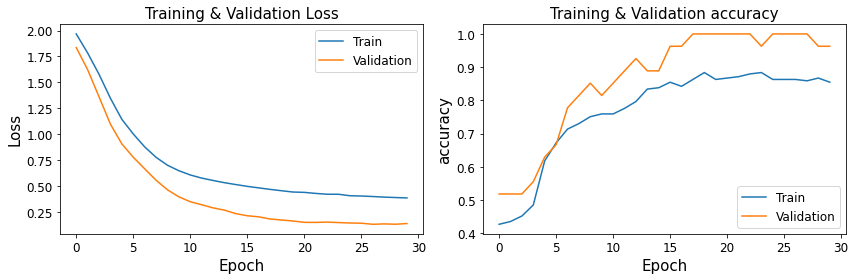

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
# Plot training & validation loss values
plt.plot(train_history_2.history['loss'], label='Train')
plt.plot(train_history_2.history['val_loss'], label='Validation')
plt.title('Training & Validation Loss', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xlabel('Epoch', fontsize=15)
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.legend(loc='upper right', fontsize=12)


plt.subplot(1,2,2)
# Plot training & validation accuracy values
plt.plot(train_history_2.history['accuracy'], label='Train')
plt.plot(train_history_2.history['val_accuracy'], label='Validation')
plt.title('Training & Validation accuracy', fontsize=15)
plt.ylabel('accuracy', fontsize=15)
plt.xlabel('Epoch', fontsize=15)
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.legend(loc='lower right', fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
# training data
model_norm.evaluate(X_train_s,y_data_categorical)

# testing data
model_norm.evaluate(X_test_s,y_test_categorical)

3/3 [==============================] - 0s 2ms/step - loss: 0.2713 - accuracy: 0.8971


[0.2712761163711548, 0.8970588445663452]

In [ ]:
import numpy as np
model2 = Sequential()
model2.add(Dense(50,input_shape=(X_data.shape[1],),activation='relu')) # input layer --> hidden layer 1
for i in range(5):
  model2.add(Dense(50,activation='relu')) # hidden layer 1 --> hidden layer 2
model2.add(Dense(8 ,activation ='sigmoid')) # hidden layer 2 --> output layer
# Compile model
model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
train_history_3 = model2.fit(X_train_s,y_data_categorical , validation_split=0.1, batch_size=5, epochs = 50)

Epoch 1/50
49/49 [==============================] - 0s 4ms/step - loss: 1.9577 - accuracy: 0.5145 - val_loss: 1.5051 - val_accuracy: 0.5926
Epoch 2/50
49/49 [==============================] - 0s 2ms/step - loss: 1.1889 - accuracy: 0.6349 - val_loss: 0.6667 - val_accuracy: 0.8519
Epoch 3/50
49/49 [==============================] - 0s 2ms/step - loss: 0.7645 - accuracy: 0.7469 - val_loss: 0.3760 - val_accuracy: 0.8889
Epoch 4/50
49/49 [==============================] - 0s 2ms/step - loss: 0.6677 - accuracy: 0.7759 - val_loss: 0.2876 - val_accuracy: 0.9259
Epoch 5/50
49/49 [==============================] - 0s 2ms/step - loss: 0.5751 - accuracy: 0.7801 - val_loss: 0.2284 - val_accuracy: 0.9259
Epoch 6/50
49/49 [==============================] - 0s 2ms/step - loss: 0.5411 - accuracy: 0.8008 - val_loss: 0.2347 - val_accuracy: 0.9259
Epoch 7/50
49/49 [==============================] - 0s 2ms/step - loss: 0.4842 - accuracy: 0.8008 - val_loss: 0.1961 - val_accuracy: 0.8889
Epoch 8/50
49/49 [==

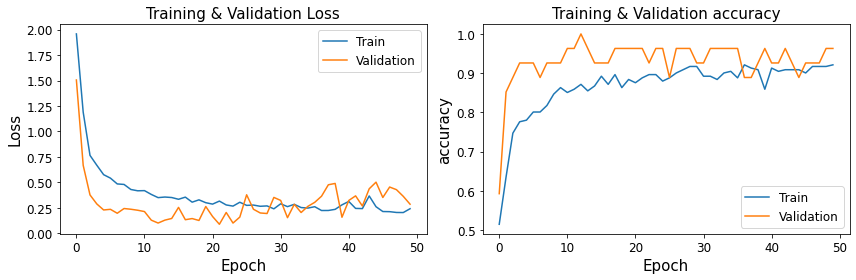

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
# Plot training & validation loss values
plt.plot(train_history_3.history['loss'], label='Train')
plt.plot(train_history_3.history['val_loss'], label='Validation')
plt.title('Training & Validation Loss', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xlabel('Epoch', fontsize=15)
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.legend(loc='upper right', fontsize=12)


plt.subplot(1,2,2)
# Plot training & validation accuracy values
plt.plot(train_history_3.history['accuracy'], label='Train')
plt.plot(train_history_3.history['val_accuracy'], label='Validation')
plt.title('Training & Validation accuracy', fontsize=15)
plt.ylabel('accuracy', fontsize=15)
plt.xlabel('Epoch', fontsize=15)
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.legend(loc='lower right', fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
# training data
model2.evaluate(X_train_s,y_data_categorical)

# testing data
model2.evaluate(X_test_s,y_test_categorical)

3/3 [==============================] - 0s 2ms/step - loss: 0.2100 - accuracy: 0.9412


[0.20997345447540283, 0.9411764740943909]

In [ ]:
import numpy as np
from keras.layers import Dropout,Activation
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.regularizers import l2
keras_callbacks   = [
      EarlyStopping(monitor='val_loss', patience=10, mode='min', min_delta=0.0001),
      ModelCheckpoint('./checkmodel.h5', monitor='val_loss', save_best_only=True, mode='min')
]
model3 = Sequential()
model3.add(Dense(50,input_shape=(X_data.shape[1],),activation='relu')) # input layer --> hidden layer 1
for i in range(3):
  model2.add(Dense(50,kernel_regularizer=l2(0.1),bias_regularizer=l2(0.1))) # hidden layer 1 --> hidden layer 2
  model3.add(BatchNormalization()) ## add batch normalization before activation
  model3.add(Activation('relu'))
  model3.add(Dropout(0.2))
model3.add(Dense(8 ,activation ='sigmoid',kernel_regularizer=l2(0.1),bias_regularizer=l2(0.1))) # hidden layer 2 --> output layer
# Compile model
model3.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
train_history_4 = model3.fit(X_train_s,y_data_categorical , validation_split=0.1, batch_size=5, epochs = 30,callbacks=keras_callbacks)

Epoch 1/30
49/49 [==============================] - 0s 9ms/step - loss: 3.3751 - accuracy: 0.1701 - val_loss: 2.9886 - val_accuracy: 0.2593
Epoch 2/30
49/49 [==============================] - 0s 3ms/step - loss: 2.8677 - accuracy: 0.2905 - val_loss: 2.7089 - val_accuracy: 0.4074
Epoch 3/30
49/49 [==============================] - 0s 3ms/step - loss: 2.5476 - accuracy: 0.3278 - val_loss: 2.4866 - val_accuracy: 0.4074
Epoch 4/30
49/49 [==============================] - 0s 3ms/step - loss: 2.2929 - accuracy: 0.4232 - val_loss: 2.2993 - val_accuracy: 0.4815
Epoch 5/30
49/49 [==============================] - 0s 3ms/step - loss: 2.1211 - accuracy: 0.4813 - val_loss: 2.1329 - val_accuracy: 0.5926
Epoch 6/30
49/49 [==============================] - 0s 3ms/step - loss: 1.9933 - accuracy: 0.5934 - val_loss: 1.9861 - val_accuracy: 0.7037
Epoch 7/30
49/49 [==============================] - 0s 3ms/step - loss: 1.8996 - accuracy: 0.5768 - val_loss: 1.8524 - val_accuracy: 0.7778
Epoch 8/30
49/49 [==

In [ ]:
# training data
model3.evaluate(X_train_s,y_data_categorical)

# testing data
model3.evaluate(X_test_s,y_test_categorical)

3/3 [==============================] - 0s 1ms/step - loss: 0.9838 - accuracy: 0.8676


[0.9837920069694519, 0.8676470518112183]

As per my observations the accuracy scores of the models increased after scaling of data, though in both cases the models didn't overfit. The model also performance after doing some parameter tuning (e.g increasing number of layers, neurons, epochs) and in this case also didn't overfit. But when I added some extra  techniques(e.g: Dropout, BatchNormalization,Callback,Weight Regularization) to further improve the performance , the accuracy score decreased as my model wasn't overfitting at the first place so I'm guessing adding Dropout and other techniques didn't help me much to improve the performance.